<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/VN_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 75, 75, 32)        36896     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/AIdata/training_set', target_size = (150,150), batch_size = 32, class_mode ='categorical')

Found 140 images belonging to 7 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/AIdata/test_set', target_size = (150,150), batch_size = 32, class_mode =  'categorical')

Found 140 images belonging to 7 classes.


In [ ]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
5/5 [==============================] - 13s 2s/step - loss: 2.0503 - accuracy: 0.1214
Epoch 2/20
5/5 [==============================] - 11s 2s/step - loss: 1.8809 - accuracy: 0.1714
Epoch 3/20
5/5 [==============================] - 13s 2s/step - loss: 1.8256 - accuracy: 0.2214
Epoch 4/20
5/5 [==============================] - 16s 3s/step - loss: 1.6346 - accuracy: 0.3214
Epoch 5/20
5/5 [==============================] - 11s 2s/step - loss: 1.4930 - accuracy: 0.3143
Epoch 6/20
5/5 [==============================] - 11s 2s/step - loss: 1.3981 - accuracy: 0.5571
Epoch 7/20
5/5 [==============================] - 12s 3s/step - loss: 1.1717 - accuracy: 0.5714
Epoch 8/20
5/5 [==============================] - 15s 3s/step - loss: 0.9912 - accuracy: 0.6500
Epoch 9/20
5/5 [==============================] - 14s 2s/step - loss: 0.8712 - accuracy: 0.6786
Epoch 10/20
5/5 [==============================] - 12s 2s/step - loss: 0.7929 - accuracy: 0.7071
Epoch 11/20
5/5 [======================

In [ ]:
Score = model.evaluate(training_set, verbose = 0)
print('Ham mat mat', Score[0])
print('Do chinh xac', Score[1])

Ham mat mat 0.20549030601978302
Do chinh xac 0.9285714030265808


In [ ]:
training_set.class_indices

{'10': 0, '100': 1, '20': 2, '200': 3, '5': 4, '50': 5, '500': 6}

In [ ]:
model.save('TVN.h5')
model_CNN = load_model('TVN.h5')

1/1 [==============================] - 0s 62ms/step


array([2])

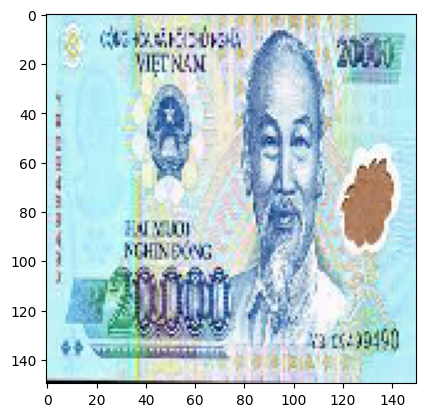

In [ ]:
img = load_img('/content/drive/MyDrive/AIdata/test_set/20/1.jpg', target_size = (150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model_CNN.predict(img), axis = 1)

1/1 [==============================] - 0s 32ms/step


array([6])

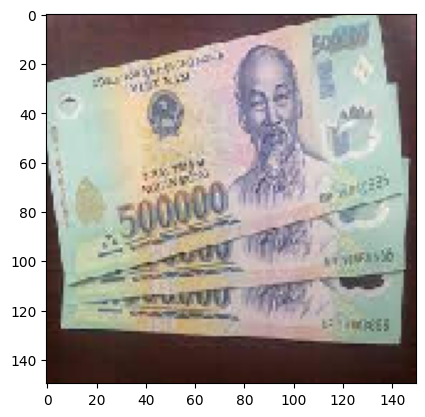

In [ ]:
img = load_img('/content/drive/MyDrive/AIdata/test_set/500/15.jpg', target_size = (150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model_CNN.predict(img), axis = 1)